In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_280718/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [7]:

import numpy as np
import numpy.ma as ma
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import xarray as xr
import glob
from datetime import datetime, timedelta
from numba import jit


In [8]:
# CODE FOR PLOTTING ONE GRID POINT with the SPEEDY_STATES OF 1st and 2nd iteration VALUES 

# Define the Speedy states files 

# from speedy_letkf covariance inflation 1.5
# (incorrectly named, should be 2010)
speedy_1_5 = '/skydata2/dylanelliott/SPEEDY_STATES/speedy_states_letkf_covariance_1_5_1981_2012.nc'
hybrid_1_5 = '/skydata2/dylanelliott/SPEEDY_STATES/speedy_states_from_hybrid_1_5_1_3_1981_2010.nc'
speedy_1_3 = '/skydata2/dylanelliott/SPEEDY_STATES/restart_1981_2011_uniform_letkf_analysis.nc'

iterative1_hybrid_1_5_1_3 = '/skydata2/dylanelliott/SPEEDY_STATES/speedy_states_from_iterative1_hybrid_1_5_1_3_19810101_20100101.nc'

retry_speedy_1_5 = '/skydata2/dylanelliott/SPEEDY_STATES/speedy_states_from_speedy_1981_2010_retry.nc'


start_year = 1981
end_year = 2010

startdate = datetime(start_year,1,1,0)
enddate = datetime(end_year,1,1,0)
time_slice = slice(startdate,enddate)

# sigma level is similar to the era file
level = 7 #2#7 #4

var_speedy = 'Temperature'
timestep_6hrly = 6 

ds_speedy_1_5 = xr.open_dataset(speedy_1_5)[var_speedy].sel(Sigma_Level=level)

ds_speedy_1_5

<xarray.DataArray 'Temperature' (Timestep: 42382, Lat: 48, Lon: 96)>
[195296256 values with dtype=float32]
Coordinates:
  * Lon      (Lon) float32 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * Lat      (Lat) float32 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
Dimensions without coordinates: Timestep
Attributes:
    units:    Kelvin

In [9]:
ds_hybrid_1_5 = xr.open_dataset(hybrid_1_5)[var_speedy].sel(Sigma_Level=level)
ds_speedy_1_3 = xr.open_dataset(speedy_1_3)[var_speedy].sel(Sigma_Level=level)
ds_retry_speedy_1_5 = xr.open_dataset(retry_speedy_1_5)[var_speedy].sel(Sigma_Level=level)
ds_iterative1 = xr.open_dataset(iterative1_hybrid_1_5_1_3)[var_speedy].sel(Sigma_Level=level)

# ds_retry_speedy_1_5

In [10]:
# select one point
x_hawaii = 81
y_hawaii = 20
# np.shape(ds_speedy_1_5) ===> (42382, 48, 96)
print(np.shape(ds_speedy_1_5[:,y_hawaii,x_hawaii]))
print(np.shape(ds_retry_speedy_1_5[:,y_hawaii,x_hawaii]))


hawaii_speedy_1_5 = ds_speedy_1_5[:,y_hawaii,x_hawaii]
hawaii_hybrid = ds_hybrid_1_5[:,y_hawaii,x_hawaii]
hawaii_speedy_1_3 = ds_speedy_1_3[:,y_hawaii,x_hawaii]
hawaii_retry_speedy_1_5 = ds_retry_speedy_1_5[:,y_hawaii,x_hawaii]
hawaii_iterative1 = ds_iterative1[:,y_hawaii,x_hawaii]


(42382,)
(42368,)


In [15]:
# make timedelta for speedy_1_5
length_speedy_1_5 = len(ds_speedy_1_5)
x_speedy_1_5 = np.arange(0,length_speedy_1_5)
date_list_speedy_1_5 = [startdate + timedelta(days=x_speedy_1_5/4) for x_speedy_1_5 in range(length_speedy_1_5)]

# make timedelta for speedy_1_3
length_speedy_1_3 = len(ds_speedy_1_3)
x_speedy_1_3 = np.arange(0,length_speedy_1_3)
date_list_speedy_1_3 = [startdate + timedelta(days=x_speedy_1_3/4) for x_speedy_1_3 in range(length_speedy_1_3)]


# make timedelta for hybrid
length_hybrid = len(ds_hybrid_1_5)
x_hybrid = np.arange(0,length_hybrid)
date_list_hybrid = [startdate + timedelta(days=x_hybrid/4) for x_hybrid in range(length_hybrid)]

# make timedelta for retry_speedy_1_5
length_retry = len(ds_retry_speedy_1_5)
x_retry = np.arange(0,length_retry)
date_list_retry = [startdate + timedelta(days=x_retry/4) for x_retry in range(length_retry)]

def maketimedelta(dataset):
    # make timedelta for retry_speedy_1_5
    length = len(dataset)
    x = np.arange(0,length)
    date_list = [startdate + timedelta(days=x/4) for x in range(length)]
    return date_list

maketimedelta(ds_iterative1)

[datetime.datetime(1981, 1, 1, 0, 0),
 datetime.datetime(1981, 1, 1, 6, 0),
 datetime.datetime(1981, 1, 1, 12, 0),
 datetime.datetime(1981, 1, 1, 18, 0),
 datetime.datetime(1981, 1, 2, 0, 0),
 datetime.datetime(1981, 1, 2, 6, 0),
 datetime.datetime(1981, 1, 2, 12, 0),
 datetime.datetime(1981, 1, 2, 18, 0),
 datetime.datetime(1981, 1, 3, 0, 0),
 datetime.datetime(1981, 1, 3, 6, 0),
 datetime.datetime(1981, 1, 3, 12, 0),
 datetime.datetime(1981, 1, 3, 18, 0),
 datetime.datetime(1981, 1, 4, 0, 0),
 datetime.datetime(1981, 1, 4, 6, 0),
 datetime.datetime(1981, 1, 4, 12, 0),
 datetime.datetime(1981, 1, 4, 18, 0),
 datetime.datetime(1981, 1, 5, 0, 0),
 datetime.datetime(1981, 1, 5, 6, 0),
 datetime.datetime(1981, 1, 5, 12, 0),
 datetime.datetime(1981, 1, 5, 18, 0),
 datetime.datetime(1981, 1, 6, 0, 0),
 datetime.datetime(1981, 1, 6, 6, 0),
 datetime.datetime(1981, 1, 6, 12, 0),
 datetime.datetime(1981, 1, 6, 18, 0),
 datetime.datetime(1981, 1, 7, 0, 0),
 datetime.datetime(1981, 1, 7, 6, 0),


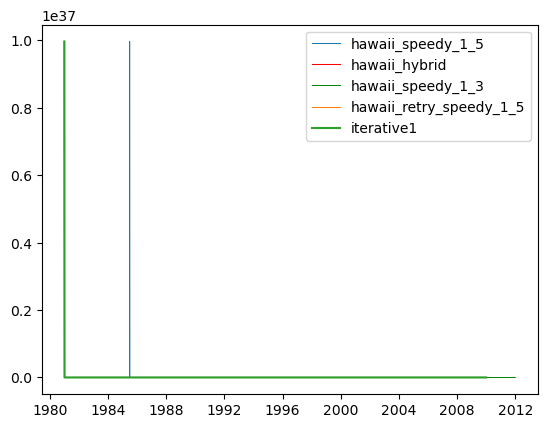

In [19]:
plt.plot(date_list_speedy_1_5,hawaii_speedy_1_5,linewidth=.75,label='hawaii_speedy_1_5')
plt.plot(date_list_hybrid,hawaii_hybrid,linewidth=.75,color='r',label='hawaii_hybrid')
plt.plot(date_list_speedy_1_3,hawaii_speedy_1_3,linewidth=.7,color='g',label='hawaii_speedy_1_3')
plt.plot(date_list_retry,hawaii_retry_speedy_1_5,linewidth=.75,label='hawaii_retry_speedy_1_5')

plt.plot(maketimedelta(ds_iterative1),hawaii_iterative1, label='iterative1')
plt.legend()

In [8]:
print(hawaii_speedy_1_5.values[0])

9.96921e+36


In [9]:
# find number of values above 1000 Kelvin (except first forecast)
above_1000 = hawaii_speedy_1_5.values[:] > 1000
print(above_1000)

count = np.sum(above_1000)
# print number of values above 1000
print(count)

[ True False False ... False False False]
2


In [10]:
ds_speedy_1_5 = xr.open_dataset(speedy_1_5)[var_speedy].sel(Sigma_Level=level)

ds_speedy_1_5

<xarray.DataArray 'Temperature' (Timestep: 42382, Lat: 48, Lon: 96)>
[195296256 values with dtype=float32]
Coordinates:
  * Lon      (Lon) float32 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * Lat      (Lat) float32 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
Dimensions without coordinates: Timestep
Attributes:
    units:    Kelvin

In [13]:
temp_at_random_point = xr.open_dataset(era_file)['Temperature'].sel(Sigma_Level=7)[era_next_hour+1,20,81].values
print(temp_at_random_point)

297.07364


In [14]:
# function to check speedystates for bad values
era_next_hour = 1

era_file = f'/skydata2/dylanelliott/SPEEDY_STATES/speedy_states_letkf_covariance_1_5_1981_2012.nc'

def xr_check(filename,era_next_hour):
    temp_at_random_point = xr.open_dataset(filename)['Temperature'].sel(Sigma_Level=7)[era_next_hour,20,81].values
    return temp_at_random_point < 1000

# this should break at 6,656 or something,, around 1985

for i in range(0,50000):
    
    output_data_good = xr_check(era_file,era_next_hour+i)
#     print(output_data_good)
    if not output_data_good:
        print('index # ', i, ' failed')
        print(xr.open_dataset(era_file)['Temperature'].sel(Sigma_Level=7)[i+1,20,81].values)
        break
        
# output_data_good = xr_check(f'/skydata2/dylanelliott/SPEEDY_STATES/speedy_states_from_speedy_1981_2012_retry.nc',era_next_hour)
# if not output_data_good:
#     run_speedy_hour()

index #  6549  failed
9.96921e+36


In [ ]:
#ADAPTED TO run_sed.py code
era_next_hour = 1

era_file = f'/skydata2/dylanelliott/SPEEDY_STATES/speedy_states_letkf_covariance_1_5_1981_2012.nc'

def xr_check(filename,era_next_hour):
    temp_at_random_point = xr.open_dataset(filename)['Temperature'].sel(Sigma_Level=7)[era_next_hour,20,81].values
    
    return temp_at_random_point < 1000

# this should break at 6,656 or something,, around 1985

# for i in range(0,50000):
    
    output_data_good = xr_check(era_file,era_next_hour+i)
    if not output_data_good:
        print('index # ', era_next_hour, ' failed')
        print(xr.open_dataset(era_file)['Temperature'].sel(Sigma_Level=7)[i+1,20,81].values)
        break